In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pyarrow.parquet as pq

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
dataset_path = '/kaggle/input/asl-signs/train_landmark_files'
dataset_files = os.listdir(dataset_path)
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
       # print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
dataset_files

['36257',
 '25571',
 '55372',
 '26734',
 '16069',
 '53618',
 '27610',
 '32319',
 '49445',
 '28656',
 '4718',
 '2044',
 '37055',
 '22343',
 '34503',
 '29302',
 '37779',
 '62590',
 '18796',
 '30680',
 '61333']

In [3]:
file_paths_dict = {}

In [4]:
for digit in dataset_files:
    # Chemin complet du répertoire du chiffre
    digit_path = os.path.join(dataset_path, digit)
    # Listes des fichiers dans le répertoire du chiffre
    digit_files = os.listdir(digit_path)
    # Chemins complets des sous-fichiers pour le chiffre
    digit_file_paths = [os.path.join(digit_path, file) for file in digit_files]
    # Stocker les chemins complets des sous-fichiers dans le dictionnaire
    file_paths_dict[digit] = digit_file_paths
    # print(file_paths_dict[digit])

In [5]:
# file_paths_dict

In [6]:
print(file_paths_dict['16069'][0])

/kaggle/input/asl-signs/train_landmark_files/16069/2285328250.parquet


In [7]:
metadata_table_test = pq.read_metadata(file_paths_dict['16069'][0])

In [8]:
metadata_table_test

  created_by: parquet-cpp-arrow version 8.0.0
  num_columns: 7
  num_rows: 11946
  num_row_groups: 1
  format_version: 1.0
  serialized_size: 3629

dataset description : 
train_landmark_files/[participant_id]/[sequence_id].parquet The landmark data. The landmarks were extracted from raw videos with the MediaPipe holistic model. Not all of the frames necessarily had visible hands or hands that could be detected by the model.

Landmark data should not be used to identify or re-identify an individual. Landmark data is not intended to enable any form of identity recognition or store any unique biometric identification.

frame - The frame number in the raw video.
row_id - A unique identifier for the row.
type - The type of landmark. One of ['face', 'left_hand', 'pose', 'right_hand'].
landmark_index - The landmark index number. Details of the hand landmark locations can be found here.
[x/y/z] - The normalized spatial coordinates of the landmark. These are the only columns that will be provided to your submitted model for inference. The MediaPipe model is not fully trained to predict depth so you may wish to ignore the z values.

In [9]:
table_test = pq.read_table(file_paths_dict['16069'][0])

In [10]:
# Show example
table_test.to_pandas()

,frame,row_id,type,landmark_index,x,y,z
0,25,25-face-0,face,0,0.508109,0.453158,-0.044283
1,25,25-face-1,face,1,0.515455,0.416532,-0.052965
2,25,25-face-2,face,2,0.510008,0.430839,-0.035313
3,25,25-face-3,face,3,0.500239,0.393610,-0.031450
4,25,25-face-4,face,4,0.515256,0.407667,-0.052959
...,...,...,...,...,...,...,...
11941,46,46-right_hand-16,right_hand,16,NaN,NaN,NaN
11942,46,46-right_hand-17,right_hand,17,NaN,NaN,NaN
11943,46,46-right_hand-18,right_hand,18,NaN,NaN,NaN
11944,46,46-right_hand-19,right_hand,19,NaN,NaN,NaN


Coordonnées relatives

Durée des séquences

Compter nombre de mots dit

Chaque utilisateur à un nombre de frame 

Utilisation de transformeur on traite des séquences (temporelles)

Puiser de l'inspiration dans l'autre Kaggle 

Preprocessing : NaN à virer

250 classes

les distributions des types (face, left hand...)

éventuellement aussi les coordonnées (x,y, z peut être moin pertinent) et les coordonnées peuvent être croisé avec les types

Dans chaque séquence l'utilisateur dit un mot

In [25]:
#file_paths_dict

In [11]:
# Count mean frame
participants = file_paths_dict.keys()
print(participants)
print(len(participants))
nb_values_cumul = 0
for keys,values in file_paths_dict.items() : 
    nb_values = len(values)
    nb_values_cumul += nb_values
    print('number of values for keys', keys, ":", nb_values)
print('mean number of frame : ', nb_values_cumul/len(participants))

dict_keys(['36257', '25571', '55372', '26734', '16069', '53618', '27610', '32319', '49445', '28656', '4718', '2044', '37055', '22343', '34503', '29302', '37779', '62590', '18796', '30680', '61333'])
21
number of values for keys 36257 : 4896
number of values for keys 25571 : 3865
number of values for keys 55372 : 4826
number of values for keys 26734 : 4841
number of values for keys 16069 : 4848
number of values for keys 53618 : 4656
number of values for keys 27610 : 4275
number of values for keys 32319 : 4753
number of values for keys 49445 : 4968
number of values for keys 28656 : 4563
number of values for keys 4718 : 3499
number of values for keys 2044 : 4810
number of values for keys 37055 : 4648
number of values for keys 22343 : 4677
number of values for keys 34503 : 4545
number of values for keys 29302 : 4722
number of values for keys 37779 : 4782
number of values for keys 62590 : 4563
number of values for keys 18796 : 3502
number of values for keys 30680 : 3338
number of values for

In [12]:
# Count duration of a sequence and then mean duration of a sequence assuming we have 24 fps
# table_test = pq.read_table(file_paths_dict['16069'][1]) pour ce cas là pourquoi ça commence à 100 frame ? 


table_test = pq.read_table(file_paths_dict['18796'][45])
table_test = table_test.to_pandas()
table_test['frame'].max()
# Idea : count max frame

27

In [52]:
max_frame_list = []
for keys,file_paths in file_paths_dict.items() :
    for file_path in file_paths:
        table = pq.read_table(file_path)
        table = table.to_pandas()
        max_frame_value = table['frame'].max()
        max_frame_list.append(max_frame_value)

In [66]:
output_file = "max_frame_list.txt"

with open(output_file, 'w') as file:
    for value in max_frame_list:
        file.write(str(value) + '\n')

In [25]:
max_frame_list = []
with open('/kaggle/input/max-frame-list/max_frame_list.txt','r') as file : 
    for value in file :
        max_frame_list.append(value)

In [26]:
max_frame_list = [element.strip() for element in max_frame_list]

In [30]:
max_frame_list = [int(element) for element in max_frame_list]

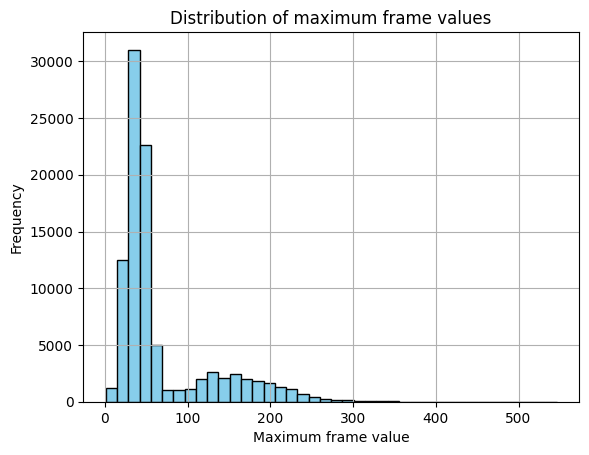

In [35]:
import matplotlib.pyplot as plt
plt.hist(max_frame_list, bins = 40, color = 'skyblue', edgecolor='black')
plt.xlabel('Maximum frame value')
plt.ylabel('Frequency')
plt.title('Distribution of maximum frame values')
plt.grid(True)
plt.show()

In [37]:
mini = 30
maxi = 60
nb_value_min_max = sum(1 for value in max_frame_list if mini <= value <= maxi)
per_plage = (nb_value_min_max / len(max_frame_list)) * 100

In [38]:
per_plage

57.702932988981445

In [60]:
train_df = pd.read_csv('/kaggle/input/asl-signs/train.csv')

In [63]:
train_df

,path,participant_id,sequence_id,sign
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie
...,...,...,...,...
94472,train_landmark_files/53618/999786174.parquet,53618,999786174,white
94473,train_landmark_files/26734/999799849.parquet,26734,999799849,have
94474,train_landmark_files/25571/999833418.parquet,25571,999833418,flower
94475,train_landmark_files/29302/999895257.parquet,29302,999895257,room


In [64]:
# occurence de chaque signe
occurence_sign = train_df['sign'].value_counts()
print(occurence_sign)

sign
listen    415
look      414
shhh      411
donkey    410
mouse     408
         ... 
dance     312
person    312
beside    310
vacuum    307
zipper    299
Name: count, Length: 250, dtype: int64
